# 渐进式熔断器
渐进式熔断器计算reject概率的公式为

$$ p=\frac{requests-k∙accepts}{requests+1}≈\frac{1-k∙acceptRatio}{1}≈1-k∙(1-failRatio) $$

如果设置容忍度配置为F，那么kratos中的k值为

$$ k=\frac{1}{1-F} $$

根据容忍度F计算reject概率的公式为

$$ p=1-\frac{1}{1-F}(1-failRatio) $$

不同容忍度F配置下, 请求失败率和reject概率的关系图

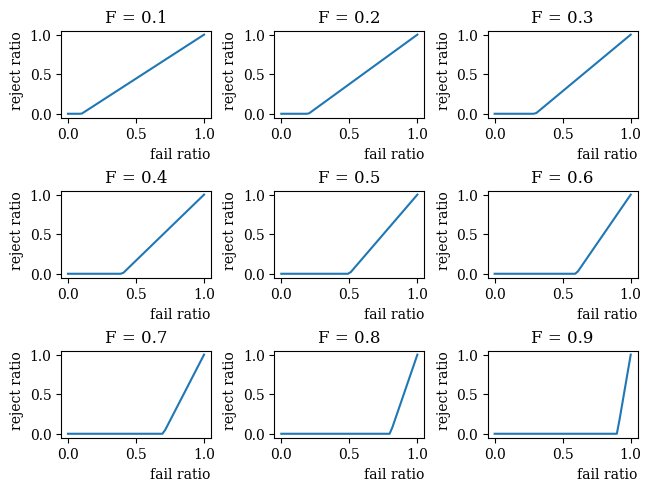

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 可以设置中文字体，有才设置
rcParams['font.family'] = 'DejaVu Serif'
rcParams['font.size'] = 10

Fs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
x = np.linspace(0, 1, 50)

fig, axs = plt.subplots(3, 3, layout='constrained')

for i, F in enumerate(Fs):
    px = i // 3
    py = i % 3
    y = 1 - (1.0 / (1.0 - Fs[i])) * (1.0 - x)
    y[y < 0] = 0
    axs[px, py].plot(x, y)
    axs[px, py].set_title('F = %.1f' % F)
    axs[px, py].set_xlabel('fail ratio', loc='right')
    axs[px, py].set_ylabel('reject ratio', loc='top')

plt.show()